In [2]:
import json
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
DATA_PATH = '/content/drive/My Drive/cs 412/Studies/'

plt.style.use('Solarize_Light2')





Mounted at /content/drive


In [3]:
coaster = pd.read_csv('{}coaster_db.csv'.format(DATA_PATH))
n_coasters = coaster.shape[0]
print(f"Dataset contains {n_coasters} rows")

Dataset contains 1087 rows


In [4]:
coaster.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [5]:
coaster.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


# First we can look at the locations of the Rollercoasters

In [15]:
fig = px.scatter_geo(
    coaster,
    lat="latitude",
    lon="longitude",
    color="Type_Main",
    width=1_000,
    height=500,
    title="Rollercoaster Dataset",
)
fig.show()

**We can see that rollercoasters are generally builded in Europe and North America**

#Secondly Roller Coaster's Speeds


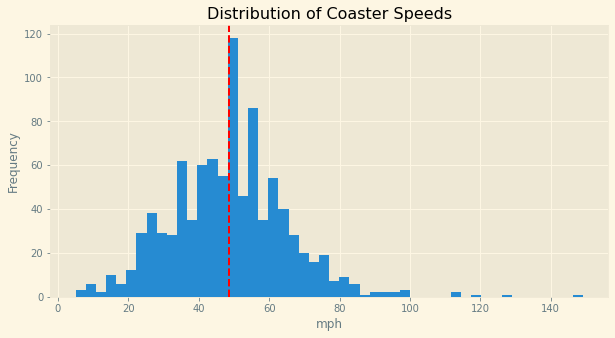

In [6]:
ax = coaster["speed_mph"].plot(
    kind="hist",
    bins=50,
    title="Distribution of Coaster Speeds",
    figsize=(10, 5),
)
ax.axvline(coaster["speed_mph"].mean(), color="red", ls="--")
ax.set_xlabel("mph")
plt.show()

We can see that the awerage speed of these rollercoasters are nearly 50 mph 

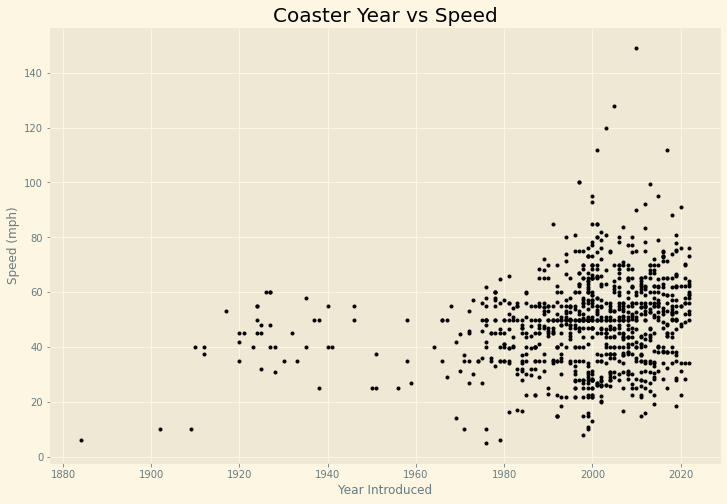

In [7]:
ax = coaster.plot(
    x="year_introduced",
    y="speed_mph",
    figsize=(12, 8),
    style=".",
    color="black",
)
ax.set_title("Coaster Year vs Speed", fontsize=20)
ax.set_xlabel("Year Introduced")
ax.set_ylabel("Speed (mph)")
ax.legend().remove()
plt.show()

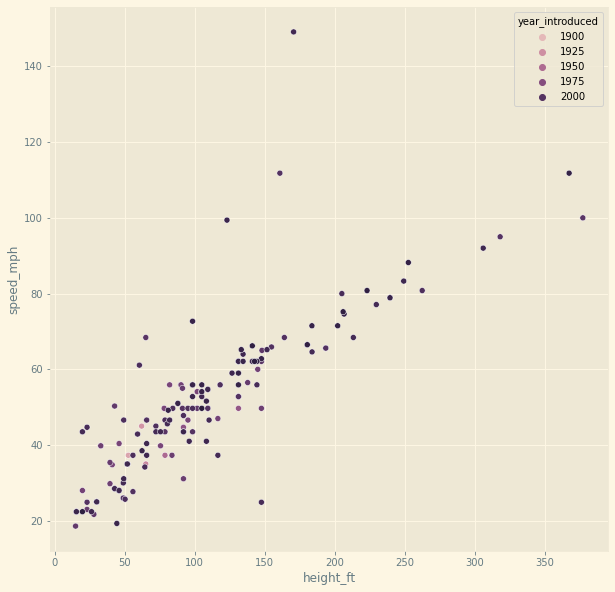

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(
    x="height_ft",
    y="speed_mph",
    data=coaster,
    hue="year_introduced",
)
plt.show()

This can bee seen that there is a positive correlation between height and speed of these coasters

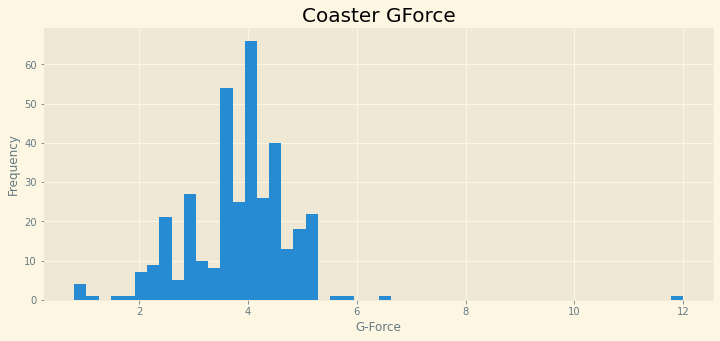

In [9]:
ax = coaster["Gforce_clean"].plot(
    kind="hist",
    bins=50,
    figsize=(12, 5),
)
ax.set_title("Coaster GForce", fontsize=20)
ax.set_xlabel("G-Force")
plt.show()